In [1]:
#select
#scm.*, czp.czp_id, czp.czp_op_id, czp.CZP_START_DATE, 
#czp.CZP_EXPIRY_DATE, czp.CZP_PERCENTAGE, czp.CZP_PRICE, 
#czp.CZP_DURATION, czp.CZP_ZTQ_ID, k.K_REGISTER, osp.*
#from zoocube.ddstf_scm_sales_contrib_margin scm
#join ZOOMAN.KUNDEN k
#on scm.CUS_N_KEY_CUSTOMER = k.K_ID 
#and k.K_REGISTER = 1
#join ZOOMAN.ORDER_SALES_PROFILE osp
#on osp.OSP_O_ID = scm.SCM_N_ORDER_NR
#left outer join ZOOMAN.CUSTOMERS_ZOOPRIME_PLANS czp
#on scm.CUS_N_KEY_CUSTOMER = czp.CZP_K_ID 
#and czp.CZP_EXPIRY_DATE >= to_date((to_char(TDT_T_KEY_ORDER_DATE, 'dd/mm/yyyy') ||' '|| THR_C_KEY_ORDER_HOUR), 'dd/mm/yyyy HH24:MI')
#and czp.CZP_START_DATE <= to_date((to_char(TDT_T_KEY_ORDER_DATE, 'dd/mm/yyyy') ||' '|| THR_C_KEY_ORDER_HOUR), 'dd/mm/yyyy HH24:MI')
#where SIT_N_KEY_SITE = 7
#and TDT_T_KEY_ORDER_DATE >= to_date('01/01/18', 'DD/MM/YY')
#and TDT_T_KEY_ORDER_DATE <= to_date('15/04/18', 'DD/MM/YY')
#and (scm.SCM_C_ORDER_STATUS = 'L' OR scm.SCM_C_ORDER_STATUS = 'VK')
#and osp.OSP_KO_COUNT_NET IN (1,2)
#;

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [3]:
data = pd.read_csv('nl_shop_new_customers_2.dsv', sep = ';', low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323991 entries, 0 to 323990
Columns: 191 entries, SCM_N_ORDER_POS_NR to OSP_EUR_VALUE
dtypes: float64(31), int64(86), object(74)
memory usage: 472.1+ MB


In [5]:
#after some exploration
not_used_cols = ['SCM_D_LIST_PRICE_UNIT', 'SCM_D_LIST_PRICE',
       'SCM_D_LIST_PRICE_UNIT_DISCOUNT', 'SCM_D_LIST_PRICE_DISCOUNT',
       'SCM_D_REC_PRICE_UNIT', 'SCM_D_REC_PRICE',
       'SCM_D_REC_PRICE_UNIT_DISCOUNT', 'SCM_D_REC_PRICE_DISCOUNT',
       'AUD_N_KEY_INS', 'AUD_N_KEY_UPD', 'SCM_T_SYS_CREATED_ON',
       'SCM_C_SYS_CREATED_BY', 'SCM_T_SYS_UPDATED_ON',
       'SCM_C_SYS_UPDATED_BY', 'SCM_D_ORDER_PROB',
       'SCM_DHL_RETURN_REASON',
       'SCM_DHL_REAL_RETURN', 'SCM_D_RETURNED_VAL_NET',
       'SCM_D_EXCHANGE_RATE', 'SCM_D_CURRENCY', 'SCM_D_CURRENCY_ORIG',
       'SCM_D_EXCHANGE_RATE_REAL', 'SCM_D_RETURN_POSTAGE_COSTS',
       'SCM_D_RETURN_REASON', 'SCM_D_SALES_CANCEL_QTY',
       'SCM_D_SALES_CANCEL_VAL', 'SCM_D_SALES_CANCEL_VAL_NET',
       'SCM_D_MST_PHY_ART_QTY', 'SCM_D_WRONG_RETURN_BOOKING',
       'SCM_D_IS_SHIPPED', 'SCM_D_EXCHANGE_RATE_FINANCE',
       'SCM_D_ORIG_ORDER_VALUE', 'SCM_D_ORIG_FINANCE_ORDER_VALUE',
       'SCM_D_ORIG_REAL_ORDER_VALUE', 'SCM_D_PAID', 'SCM_D_MISSING_ITEM_IN_PARCEL',
       'SCM_DATE_FULFILLMENT', 'SCM_D_PC_ID', 'SCM_D_PCB_ID',
       'SCM_D_PC_DSP', 'SCM_D_PC_ID_RET',
       'SCM_D_PC_ID_SALC', 'SCM_ID', 'SCM_RETURN_REASON_ID',
       'SCM_RETURN_REACTION_TIME', 'SCM_EXCHANGE_RETURN',
       'SCM_RETURN_IS_OK', 'SCM_CM2_BMF_INCL_EXTRA_COSTS', 'SCM_CM1_BMF_INCL_PU_EX',
       'SCM_LINEHOLD_COSTS_PHY_ART', 'SCM_CM1_BMF_PC_EX_VOL',
       'SCM_CM2_BMF_REAL_VOL', 'SCM_PAYMENT_PROVIDER', 'SCM_CM1_CP', 'SCM_CM2_CP', 'SCM_CM3_CP', 'SCM_CM4_CP',
       'SCM_CM1_BMF_CP', 'SCM_CM2_BMF_CP', 'SCM_CM3_BMF_CP',
       'SCM_CM4_BMF_CP', 'SCM_NETSALES_CP', 'SCM_NETSALES_BMF_CP', 'SCM_ORDER_HOUR', 'SCM_FC_HOUR', 'SCM_SHIPPING_HOUR',
                 'SCM_DELIVERY_TIME',
       'SCM_WAREHOUSE_TIME', 'SCM_TOTAL_ORDER_TIME',
       'SCM_POSTOFFICE_DATE', 'SCM_POSTOFFICE_HOUR',
       'SCM_TO_POSTOFFICE_TIME', 'SCM_FROM_POSTOFFICE_HOUR',
       'SCM_FIRST_ORDER_CT_ID', 'SCM_FIRST_ORDER_DATE', 'SCM_ORDER_DAY',
       'SCM_FC_DAY', 'SCM_SHIPPING_DAY', 'SCM_POSTOFFICE_DAY',
       'SCM_DELIVERY_DAY', 'SCM_NUMBER_DEV_TRY',
       'SCM_PARCEL_IS_UNDELIVERABLE', 'SCM_MAIN_CATEGORY',
       'SCM_RETURNS_BMF',
       'SCM_SALES_CANCEL_BMF', 'SCM_SB_CLASS']

In [6]:
cols = [i for i in data.columns.values if i not in not_used_cols]

In [7]:
len(cols)

105

In [8]:
nc_nl = data[cols]

In [9]:
#Total orders
nc_nl['SCM_N_ORDER_NR'].nunique()

90150

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
nc_nl['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(nc_nl['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [12]:
lista = [float(i.replace(',','.')) for i in nc_nl['SCM_D_SALES_VALUE']]
nc_nl['SCM_D_SALES_VALUE'] = lista

In [13]:
lista1 = [float(str(i).replace(',','.')) for i in nc_nl['SCM_SALES_BMF']]
nc_nl['SCM_SALES_BMF'] = lista1

In [14]:
lista2 = [float(i.replace(',','.')) for i in nc_nl['SCM_D_FINANCE_CM1']]
nc_nl['SCM_D_FINANCE_CM1'] = lista2

In [15]:
lista3 = [float(i.replace(',','.')) for i in nc_nl['SCM_D_FINANCE_CM2']]
nc_nl['SCM_D_FINANCE_CM2'] = lista3

In [16]:
nc_nl['CZP_START_DATE'] = pd.to_datetime(nc_nl['CZP_START_DATE'], format="%d/%m/%y")
nc_nl['CZP_EXPIRY_DATE'] = pd.to_datetime(nc_nl['CZP_EXPIRY_DATE'], format="%d/%m/%y")

In [17]:
#Check if, due to start/expiry/order date some data has been duplicated... 
nc_nl.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values

array([array(['NaT'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]'), ...,
       array(['2018-04-15T00:00:00.000000000'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]')], dtype=object)

In [18]:
dupl_mask = [len(i) > 1 for i in nc_nl.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [19]:
len(dupl_mask)

90150

In [20]:
sum(dupl_mask)

0

In [21]:
dup_orders = nc_nl.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

In [22]:
dup_orders

array([], dtype=int64)

In [23]:
nc_nl[nc_nl['SCM_N_ORDER_NR'] == 107751618][nc_nl.columns[60:80]]

,SCM_PARCEL_SPLIT,SCM_VOLUME_PARCEL_PART,SCM_PURCHASE_EXTRA_COSTS,SCM_LINEHOLD_COSTS,SCM_IS_SINGLE_CATEGORY,SCM_FC_ANALYSIS,SCM_IS_ZSP_ORDER,SCM_DELIVERY_DATE,SCM_DELIVERY_HOUR,SCM_SALES_BMF,SCM_NETSALES_BMF,CZP_ID,CZP_OP_ID,CZP_START_DATE,CZP_EXPIRY_DATE,CZP_PERCENTAGE,CZP_PRICE,CZP_DURATION,CZP_ZTQ_ID,K_REGISTER
310249,0,"4,988","0,03",0,multi category order,single z+ fc,1,NaN,NaN,15.99,"13,2149",3564503.0,459544239.0,2018-03-31,2019-03-31,5.0,"5,99",1.0,56.0,1
310250,0,"8,972","0,04",0,multi category order,single z+ fc,1,NaN,NaN,19.99,"16,5207",3564503.0,459544239.0,2018-03-31,2019-03-31,5.0,"5,99",1.0,56.0,1
310251,0,0,0,0,multi category order,single z+ fc,1,NaN,NaN,5.99,"4,9504",3564503.0,459544239.0,2018-03-31,2019-03-31,5.0,"5,99",1.0,56.0,1
310252,0,0,0,0,multi category order,single z+ fc,1,NaN,NaN,-2.10,"-1,7355",3564503.0,459544239.0,2018-03-31,2019-03-31,5.0,"5,99",1.0,56.0,1


In [24]:
#Let's get incorrect duplicated indexes instead of order_id to exclude them and select de correct data subset
dup_indexes = []

for i in dup_orders:
    o_id = nc_nl[nc_nl['SCM_N_ORDER_NR'] == i]
    sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
    min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
    dup_indexes.append(min_date.index.values)

In [25]:
#Get a flatten list of indexes
dupl_ind = [i for lista in dup_indexes for i in lista]

In [26]:
len(dupl_ind)

0

In [27]:
exclude_data = nc_nl.index.isin(dupl_ind)

In [28]:
len(exclude_data), sum(exclude_data)

(323991, 0)

In [29]:
#Clean subset selection
nc_nl = nc_nl[~exclude_data]

In [30]:
nc_nl[nc_nl['SCM_N_ORDER_NR'] == 107751618][nc_nl.columns[60:80]]

,SCM_PARCEL_SPLIT,SCM_VOLUME_PARCEL_PART,SCM_PURCHASE_EXTRA_COSTS,SCM_LINEHOLD_COSTS,SCM_IS_SINGLE_CATEGORY,SCM_FC_ANALYSIS,SCM_IS_ZSP_ORDER,SCM_DELIVERY_DATE,SCM_DELIVERY_HOUR,SCM_SALES_BMF,SCM_NETSALES_BMF,CZP_ID,CZP_OP_ID,CZP_START_DATE,CZP_EXPIRY_DATE,CZP_PERCENTAGE,CZP_PRICE,CZP_DURATION,CZP_ZTQ_ID,K_REGISTER
310249,0,"4,988","0,03",0,multi category order,single z+ fc,1,NaN,NaN,15.99,"13,2149",3564503.0,459544239.0,2018-03-31,2019-03-31,5.0,"5,99",1.0,56.0,1
310250,0,"8,972","0,04",0,multi category order,single z+ fc,1,NaN,NaN,19.99,"16,5207",3564503.0,459544239.0,2018-03-31,2019-03-31,5.0,"5,99",1.0,56.0,1
310251,0,0,0,0,multi category order,single z+ fc,1,NaN,NaN,5.99,"4,9504",3564503.0,459544239.0,2018-03-31,2019-03-31,5.0,"5,99",1.0,56.0,1
310252,0,0,0,0,multi category order,single z+ fc,1,NaN,NaN,-2.10,"-1,7355",3564503.0,459544239.0,2018-03-31,2019-03-31,5.0,"5,99",1.0,56.0,1


In [31]:
#Consider L and VK status as completed orders
nc_nl['SCM_C_ORDER_STATUS'].value_counts()

L     322580
VK      1411
Name: SCM_C_ORDER_STATUS, dtype: int64

In [32]:
nc_nl[nc_nl['SCM_N_ORDER_NR'].isin(dup_orders)]['CUS_N_KEY_CUSTOMER'].unique()

array([], dtype=int64)

In [33]:
#select * from ZOOMAN.CUSTOMERS_ZOOPRIME_PLANS where CZP_K_ID = 16375298;

#select * from orders where O_K_ID = 16375298;

## Changes : PG4 Restrictions, DCR and Prices

In [34]:
#Let`s quantify orders buying savings plan
sp_daily = nc_nl[nc_nl['SCM_MASTER_AP_ID'] == 42225].groupby('TDT_T_KEY_ORDER_DATE')['SCM_MASTER_AP_ID'].count()

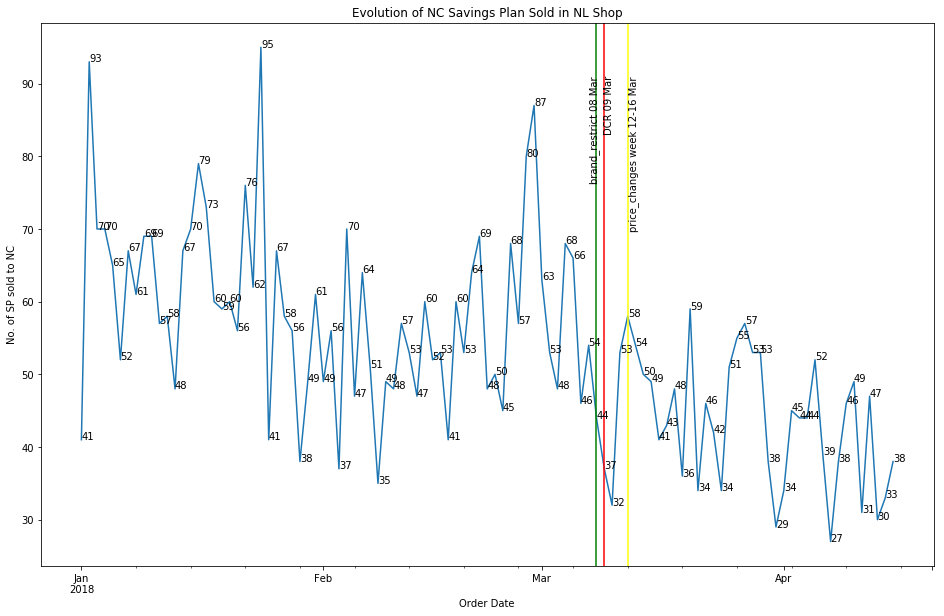

In [35]:
plt.figure(figsize=(16,10))
(sp_daily).plot()
plt.ylabel('No. of SP sold to NC')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan Sold in NL Shop')

plt.axvline(x='2018-03-08', color='green')
plt.text('2018-03-07', 90, 'brand_restrict 08 Mar', rotation=90)
plt.axvline(x='2018-03-09', color='red')
plt.text('2018-03-09', 90, 'DCR 09 Mar', rotation=90)
plt.axvline(x='2018-03-12', color='yellow')
plt.text('2018-03-12', 90, 'price_changes week 12-16 Mar', rotation=90)

ax = plt.gca()
for i, txt in enumerate(sp_daily):
    ax.annotate(txt, (sp_daily.index[i],sp_daily.values[i]))

In [36]:
sp_daily[sp_daily.index < '2018-03-08'].mean()

59.015151515151516

In [37]:
sp_daily[sp_daily.index >= '2018-03-08'].mean()

43.41025641025641

A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same. 

In [38]:
import scipy.stats as stats
stats.ttest_ind(sp_daily[sp_daily.index < '2018-03-08'],
                sp_daily[sp_daily.index >= '2018-03-08'],
                equal_var=False) 

Ttest_indResult(statistic=7.443704956633709, pvalue=3.548007124442767e-11)

Due to p-value < 0.05 we can now reject the null hypothesis stating equality of mean in both groups and go for the alternative one (non equal).

In [39]:
lista4 = [float(str(i).replace(',','.')) for i in nc_nl['CZP_PRICE']]
nc_nl['CZP_PRICE'] = lista4

In [40]:
buy_sp_orders = nc_nl[nc_nl['SCM_MASTER_AP_ID'] == 42225]['SCM_N_ORDER_NR'].unique()

In [41]:
#Let`s quantify sales related to savings plan price
sp_sales_daily = nc_nl[nc_nl['SCM_MASTER_AP_ID'] == 42225].groupby('TDT_T_KEY_ORDER_DATE')['SCM_SALES_BMF'].sum()

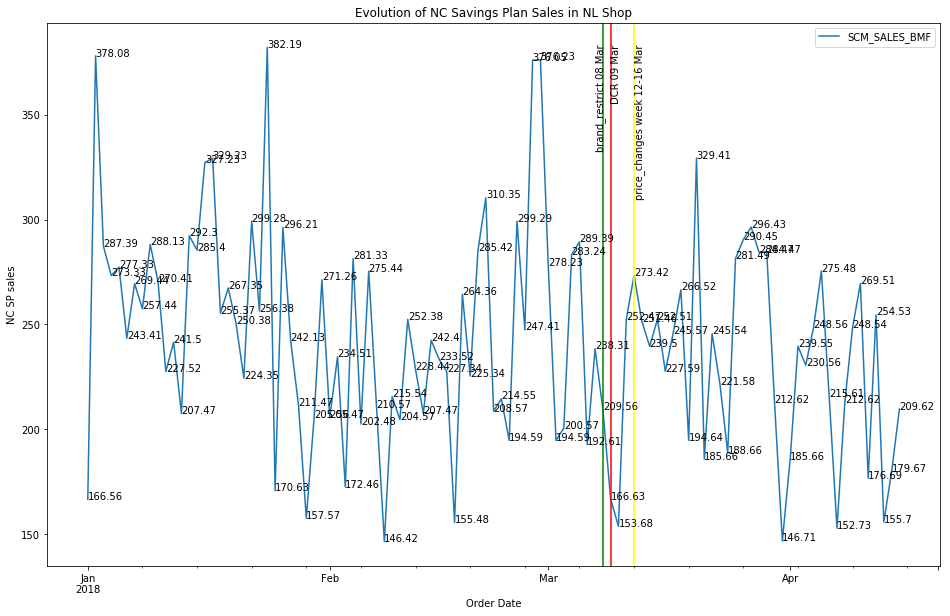

In [42]:
plt.figure(figsize=(16,10))
(sp_sales_daily).plot()
plt.ylabel('NC SP sales')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan Sales in NL Shop')
plt.legend()

plt.axvline(x='2018-03-08', color='green')
plt.text('2018-03-07', 380, 'brand_restrict 08 Mar', rotation=90)
plt.axvline(x='2018-03-09', color='red')
plt.text('2018-03-09', 380, 'DCR 09 Mar', rotation=90)
plt.axvline(x='2018-03-12', color='yellow')
plt.text('2018-03-12', 380, 'price_changes week 12-16 Mar', rotation=90)

ax = plt.gca()
for i, txt in enumerate(sp_sales_daily):
    ax.annotate(txt, (sp_sales_daily.index[i],sp_sales_daily.values[i]))

In [43]:
sp_sales_daily[sp_sales_daily.index < '2018-03-08'].mean()

249.80636363636376

In [44]:
sp_sales_daily[sp_sales_daily.index >= '2018-03-08'].mean()

229.6428205128206

In [45]:
stats.ttest_ind(sp_sales_daily[sp_sales_daily.index < '2018-03-08'],
                sp_sales_daily[sp_sales_daily.index >= '2018-03-08'],
                equal_var=False) 

Ttest_indResult(statistic=2.0502245020790295, pvalue=0.043248547999075744)

Due to p-value < 0.05 we can now reject the null hypothesis stating equality of mean in both groups and go for the alternative one (non equal).

In [46]:
# And now absolute cm1 and cm2 (mean) per order per day 
sp_cm1_daily = nc_nl[nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_D_FINANCE_CM1'].sum()/\
               nc_nl[nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_N_ORDER_NR'].nunique()
sp_cm2_daily = nc_nl[nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_D_FINANCE_CM2'].sum()/\
               nc_nl[nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_N_ORDER_NR'].nunique()

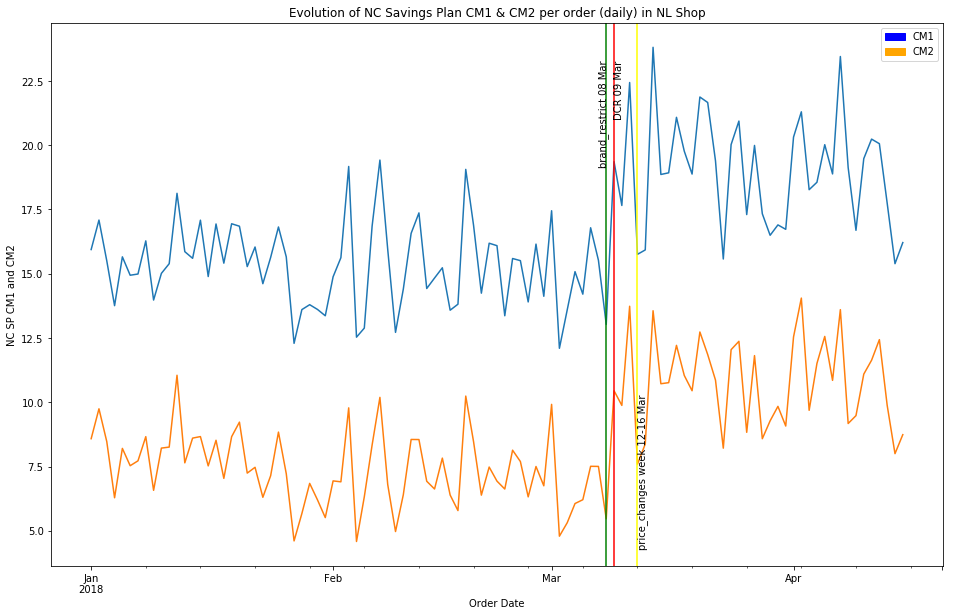

In [170]:
plt.figure(figsize=(16,10))
(sp_cm1_daily).plot()
(sp_cm2_daily).plot()
plt.ylabel('NC SP CM1 and CM2')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan CM1 & CM2 per order (daily) in NL Shop')

blue_patch = mpatches.Patch(color='blue', label='CM1')
og_patch = mpatches.Patch(color='orange', label='CM2')
plt.legend(handles=[blue_patch, og_patch])

plt.axvline(x='2018-03-08', color='green')
plt.text('2018-03-07', 23, 'brand_restrict 08 Mar', rotation=90)
plt.axvline(x='2018-03-09', color='red')
plt.text('2018-03-09', 23, 'DCR 09 Mar', rotation=90)
plt.axvline(x='2018-03-12', color='yellow')
plt.text('2018-03-12', 10, 'price_changes week 12-16 Mar', rotation=90)

ax = plt.gca()

**Absolute CM1**

In [48]:
#Mean CM1 per order before 08 Mar
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]['SCM_D_FINANCE_CM1'].sum()/\
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]['SCM_N_ORDER_NR'].nunique()

15.363939897304235

In [49]:
#CM1 per order before 08 Mar
cm1_per_order_bef = nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [50]:
#Mean CM1 per order from 08 Mar on
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-08')]['SCM_D_FINANCE_CM1'].sum()/\
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-08')]['SCM_N_ORDER_NR'].nunique()

18.861188954518607

In [51]:
#CM1 per order from 08 Mar on
cm1_per_order_aft = nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [52]:
stats.ttest_ind(cm1_per_order_bef,
                cm1_per_order_aft,
                equal_var=False) 

Ttest_indResult(statistic=-9.136552645203656, pvalue=1.2224035733135671e-19)

Due to p-value < 0.05 we can now reject the null hypothesis stating equality of mean in both groups and go for the alternative one (non equal).

**Absolute CM2**

In [53]:
#Daily mean CM2 per order before 08 Mar
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]['SCM_D_FINANCE_CM2'].sum()/\
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]['SCM_N_ORDER_NR'].nunique()

7.44954947368421

In [54]:
cm2_per_order_bef = nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()

In [55]:
#Daily mean CM2 per order from 08 Mar on
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-08')]['SCM_D_FINANCE_CM2'].sum()/\
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-08')]['SCM_N_ORDER_NR'].nunique()

10.646562787950383

In [56]:
cm2_per_order_aft = nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()

In [57]:
stats.ttest_ind(cm2_per_order_bef,
                cm2_per_order_aft,
                equal_var=False) 

Ttest_indResult(statistic=-10.216071696965075, pvalue=4.392939882918228e-24)

Due to p-value < 0.05 we can now reject the null hypothesis stating equality of mean in both groups and go for the alternative one (non equal).

In [58]:
lista5 = [float(str(i).replace(',','.')) for i in nc_nl['OSP_NET_VALUE']]
nc_nl['OSP_NET_VALUE'] = lista5

In [59]:
nc_nl['REL_%_CM1'] = nc_nl['SCM_D_FINANCE_CM1'] / nc_nl['OSP_NET_VALUE'] * 100

In [60]:
nc_nl['REL_%_CM2'] = nc_nl['SCM_D_FINANCE_CM2'] / nc_nl['OSP_NET_VALUE'] * 100

In [61]:
#Relative % cm1 and cm2 (mean) per order per day 
rel_cm1_per_order = nc_nl[nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)]\
.groupby(['TDT_T_KEY_ORDER_DATE','SCM_N_ORDER_NR'],  as_index=False)['REL_%_CM1'].sum()

rel_cm1_per_order_by_day = rel_cm1_per_order.groupby('TDT_T_KEY_ORDER_DATE')['REL_%_CM1'].mean()

rel_cm2_per_order = nc_nl[nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)]\
.groupby(['TDT_T_KEY_ORDER_DATE','SCM_N_ORDER_NR'],  as_index=False)['REL_%_CM2'].sum()

rel_cm2_per_order_by_day = rel_cm2_per_order.groupby('TDT_T_KEY_ORDER_DATE')['REL_%_CM2'].mean()

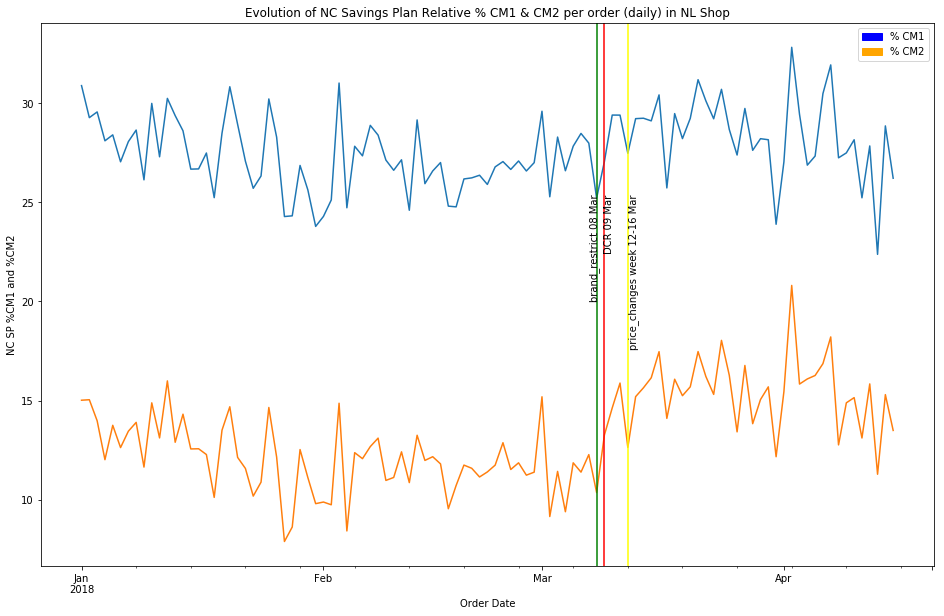

In [62]:
plt.figure(figsize=(16,10))
(rel_cm1_per_order_by_day).plot()
(rel_cm2_per_order_by_day).plot()
plt.ylabel('NC SP %CM1 and %CM2')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan Relative % CM1 & CM2 per order (daily) in NL Shop')

blue_patch = mpatches.Patch(color='blue', label='% CM1')
og_patch = mpatches.Patch(color='orange', label='% CM2')
plt.legend(handles=[blue_patch, og_patch])

plt.axvline(x='2018-03-08', color='green')
plt.text('2018-03-07', 25, 'brand_restrict 08 Mar', rotation=90)
plt.axvline(x='2018-03-09', color='red')
plt.text('2018-03-09', 25, 'DCR 09 Mar', rotation=90)
plt.axvline(x='2018-03-12', color='yellow')
plt.text('2018-03-12', 25, 'price_changes week 12-16 Mar', rotation=90)

ax = plt.gca()

**Relative CM1**

In [63]:
#Mean relative CM1 % per order before 08 Mar
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum().mean()

27.232904534406714

In [64]:
#Relative CM1 % per order before 08 Mar
rel_cm1_per_order_bef = nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum()

In [65]:
#Mean relative CM1 % per order from 08 Mar on
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum().mean()

28.355169686249926

In [66]:
#Relative CM1 % per order from 08 Mar on
rel_cm1_per_order_aft = nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum()

**Relative CM2**

In [67]:
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum().mean()

12.036206728669654

In [68]:
rel_cm2_per_order_bef = nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum()

In [69]:
nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum().mean()

15.256785209757203

In [70]:
rel_cm2_per_order_aft = nc_nl[(nc_nl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum()

***SUMMARY***

| Date        | No. NC SP Sold per day| Sales NC SP Sold per day | CM1 per order (daily) | CM2 per order (daily)  | CM1% per order (daily) | CM2% per order (daily)  |
| ------------- |:-------------:| -----:|:-------------:| -----:||:-------------:| -----:|
| Before 08 Mar      | 59.02 | 249.81 | 15.36 | 7.45 |27.23% | 12.04% |
| From 08 Mar on     | 43.41      |   229.64 | 18.86 | 10.65 |28.36% | 15.26% |

...........................................................................................................................................................................................................................................

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
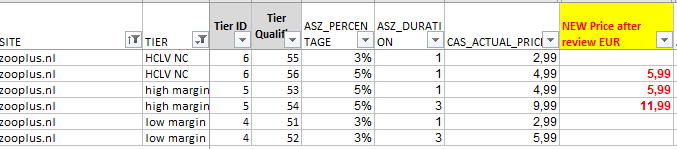

In [71]:
#Type & number of different Savings Plan bought
nc_nl[nc_nl['SCM_MASTER_AP_ID'] == 42225]['CZP_ZTQ_ID'].value_counts()

56.0     1417
55.0      293
151.0       6
Name: CZP_ZTQ_ID, dtype: int64

In [72]:
#Number of 1st and 2nd orders in our dataset
nc_nl.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean().value_counts()

1    53835
2    36315
Name: OSP_KO_COUNT_NET, dtype: int64

In [73]:
#Let's list new lead PG4 restrictions for NL SHOP
pg4_excluded = [283, 754, 311, 2302, 282, 3797, 167128, 314, 286, 315, 37572, 285, 867, 
                2072, 2071, 218624, 10728, 2085, 2078, 209912, 9616]

In [74]:
#HCLV PG3 old
pg3_hclv_old = [857, 251, 2068, 252, 18, 301, 23, 29, 34, 38]

In [75]:
#HCLV PG3 new set up
pg3_hclv_new = [23, 38, 251, 252, 857, 2068]

In [76]:
#Split dataset using 08/03/2018 as inflection point...
bef = nc_nl[nc_nl['TDT_T_KEY_ORDER_DATE'] < '2018-03-08']
aft = nc_nl[nc_nl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-08']

In [77]:
bef['SCM_N_ORDER_NR'].nunique(), aft['SCM_N_ORDER_NR'].nunique()

(57489, 32661)

**Conversion before 08 Mar Period**

Let's evaluate NC SP conversion in first orders (before 08 Mar) dividing total SP sold in first order (having HCLV PG3 old set up and AP_ID == 42225) by total 1st orders placed having the suitable HCLV PG3 (old set up):

In [78]:
#All eligible customers in 1st orders having HCLV PG3 (old set up)
all_elig_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old))]['CUS_N_KEY_CUSTOMER'].unique()

In [79]:
#Those eligible in 1st order who also bought it
buy_in_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) & (bef['SCM_MASTER_AP_ID'] == 42225)]\
['CUS_N_KEY_CUSTOMER'].unique()

In [80]:
len(buy_in_1st)

1645

In [81]:
len(all_elig_1st)

19571

% Conversion rate in 1st orders

In [82]:
float(len(buy_in_1st)) / len(all_elig_1st) * 100

8.405293546574013

Let's go through 2nd orders conversion using set operations. Due to time window, we are going to use only data from customer having both, 1st and 2nd orders in the dataset.

In [83]:
#Total customers id in 1st orders
cus_1st = bef[bef['OSP_KO_COUNT_NET'] == 1]['CUS_N_KEY_CUSTOMER'].unique()

In [84]:
#Total 2nd orders
cus_2nd = bef[bef['OSP_KO_COUNT_NET'] == 2]['CUS_N_KEY_CUSTOMER'].unique()

In [85]:
cus_sample = [i for i in cus_1st if i in cus_2nd]

In [86]:
#1st orders in cus_sample
cus_1_st = bef[(bef['OSP_KO_COUNT_NET'] == 1) &
           bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample)]['CUS_N_KEY_CUSTOMER'].unique()

In [87]:
#2nd orders in cus_sample
cus_2_nd = bef[(bef['OSP_KO_COUNT_NET'] == 2) &
           bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample)]['CUS_N_KEY_CUSTOMER'].unique()

In [88]:
len(cus_sample), len(cus_1_st), len(cus_2_nd)

(6417, 6417, 6417)

In [89]:
#Eligible customer ids in 1st order
cus_elig_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) &
                  (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]['CUS_N_KEY_CUSTOMER'].unique()

In [90]:
len(cus_elig_1st)

4050

In [91]:
#Non-eligible customer ids in 1st order
cus_not_elig_1st = [i for i in cus_1_st if i not in cus_elig_1st]

In [92]:
len(cus_not_elig_1st)

2367

In [93]:
len(cus_elig_1st) + len(cus_not_elig_1st) == len(cus_1_st)

True

In [94]:
#Customer ids elegible in 1st and buying SP in 1st
cus_buy_in_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) &
                (bef['SCM_MASTER_AP_ID'] == 42225) & (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]\
                ['CUS_N_KEY_CUSTOMER'].unique()

In [95]:
len(cus_buy_in_1st)

494

% Conversion rate in 1st orders for our sample (higher...due to a more buying frequency?)

In [96]:
float(len(cus_buy_in_1st)) / len(cus_elig_1st) * 100

12.197530864197532

In [97]:
#Customer ids elegible in 1st but not buying SP 
cus_elig_1st_not_buy = [i for i in cus_elig_1st if i not in cus_buy_in_1st]

In [98]:
len(cus_elig_1st_not_buy)

3556

In [99]:
len(cus_buy_in_1st) + len(cus_elig_1st_not_buy) == len(cus_elig_1st)

True

In [100]:
#Customer ids with suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_elig_2nd = bef[(bef['OSP_KO_COUNT_NET'] == 2) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) &
                  (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]['CUS_N_KEY_CUSTOMER'].unique()

In [101]:
len(cus_elig_2nd)

4213

In [102]:
#Customer ids with no suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_not_elig_2nd = [i for i in cus_2_nd if i not in cus_elig_2nd]

In [103]:
len(cus_not_elig_2nd)

2204

In [104]:
#Total SP bought in 2nd order
cus_buy_in_2nd = bef[(bef['OSP_KO_COUNT_NET'] == 2) & (bef['SCM_MASTER_AP_ID'] == 42225) &
                   (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]['CUS_N_KEY_CUSTOMER'].unique()

In [105]:
len(cus_buy_in_2nd)

628

In [106]:
#Eligible in 1st order customer ids making a 2nd order but not buying 
cus_elig_1st_2nd = [i for i in cus_elig_1st_not_buy if i in cus_2_nd and i not in cus_buy_in_2nd]

In [107]:
len(cus_elig_1st_2nd)

3028

In [108]:
#Eligible in 1st order customer ids making a 2nd order where SP is bought 
cus_elig_1st_buy_2nd = [i for i in cus_elig_1st_not_buy if i in cus_buy_in_2nd]

In [109]:
len(cus_elig_1st_buy_2nd)

528

In [110]:
len(cus_elig_1st_2nd) + len(cus_elig_1st_buy_2nd) == len(cus_elig_1st_not_buy)

True

In [111]:
#Customers ids non eligible in 1st, eligible during 2nd and not buying SP
cus_not_elig_1st_2nd = [i for i in cus_not_elig_1st if i in cus_elig_2nd and i not in cus_buy_in_2nd]

In [112]:
len(cus_not_elig_1st_2nd)

788

In [113]:
#Customers ids non eligible in 1st, eligible during 2nd and buying SP
cus_not_elig_1st_buy_2nd = [i for i in cus_not_elig_1st if i in cus_buy_in_2nd]

In [114]:
len(cus_not_elig_1st_buy_2nd)

100

In [115]:
#eligible and non eligible customer ids in 1st order, eligible in 2nd and buying SP
len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_buy_2nd)

628

In [116]:
#Total eligible customer ids in 2nd order
len(cus_elig_1st_2nd) + len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_2nd) + len(cus_not_elig_1st_buy_2nd)

4444

% Conversion rate in 2nd order

In [117]:
float(len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_buy_2nd))/\
(len(cus_elig_1st_2nd) + len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_2nd) + len(cus_not_elig_1st_buy_2nd)) * 100

14.13141314131413

**Conversion from 08 Mar Period**

In [118]:
#Number of 1st and 2nd orders from 08 Mar on
aft_1st = aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean()[aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean() == 1].index.values
aft_2nd = aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean()[aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean() == 2].index.values

In [119]:
#All eligible customers in 1st orders having HCLV PG3 (new set up) and not having excluding PG4
all_elig_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new))
                    & (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded))]['CUS_N_KEY_CUSTOMER'].unique()

In [120]:
#Those eligible in 1st order who also bought it
buy_in_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                   (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) & (aft['SCM_MASTER_AP_ID'] == 42225)]\
                    ['CUS_N_KEY_CUSTOMER'].unique()

In [121]:
len(buy_in_1st_a)

893

In [122]:
len(all_elig_1st_a)

8060

% Conversion rate in 1st orders

In [123]:
float(len(buy_in_1st_a)) / len(all_elig_1st_a) * 100

11.07940446650124

Let's go through 2nd orders conversion using set operations. Due to time window, we are going to use only data from customer having both, 1st and 2nd orders in the dataset.

In [124]:
#Total customers id in 1st orders
cus_1st_a = aft[aft['OSP_KO_COUNT_NET'] == 1]['CUS_N_KEY_CUSTOMER'].unique()

In [125]:
#Total 2nd orders
cus_2nd_a = aft[aft['OSP_KO_COUNT_NET'] == 2]['CUS_N_KEY_CUSTOMER'].unique()

In [126]:
cus_sample_a = [i for i in cus_1st_a if i in cus_2nd_a]

In [127]:
cus_1_st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) &
           aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a)]['CUS_N_KEY_CUSTOMER'].unique()

In [128]:
cus_2_nd_a = aft[(aft['OSP_KO_COUNT_NET'] == 2) &
           aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a)]['CUS_N_KEY_CUSTOMER'].unique()

In [129]:
len(cus_sample_a), len(cus_1_st_a), len(cus_2_nd_a)

(2130, 2130, 2130)

In [130]:
#Eligible customer ids in 1st order
cus_elig_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) & (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]\
                ['CUS_N_KEY_CUSTOMER'].unique()

In [131]:
len(cus_elig_1st_a)

894

In [132]:
#Non-eligible customer ids in 1st order
cus_not_elig_1st_a = [i for i in cus_1_st_a if i not in cus_elig_1st_a]

In [133]:
len(cus_not_elig_1st_a)

1236

In [134]:
len(cus_elig_1st_a) + len(cus_not_elig_1st_a) == len(cus_1_st_a)

True

In [135]:
#Customer ids elegible in 1st and buying SP in 1st
cus_buy_in_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                    (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) &
                    (aft['SCM_MASTER_AP_ID'] == 42225) & (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]\
                    ['CUS_N_KEY_CUSTOMER'].unique()

In [136]:
len(cus_buy_in_1st_a)

160

% Conversion rate in 1st orders for our sample (higher...due to a more buying frequency?)

In [137]:
float(len(cus_buy_in_1st_a)) / len(cus_elig_1st_a) * 100

17.89709172259508

In [138]:
#Customer ids elegible in 1st but not buying SP 
cus_elig_1st_not_buy_a = [i for i in cus_elig_1st_a if i not in cus_buy_in_1st_a]

In [139]:
len(cus_elig_1st_not_buy_a)

734

In [140]:
len(cus_buy_in_1st_a) + len(cus_elig_1st_not_buy_a) == len(cus_elig_1st_a)

True

In [141]:
#Customer ids with suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_elig_2nd_a = aft[(aft['OSP_KO_COUNT_NET'] == 2) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                   (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) &
                  (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]['CUS_N_KEY_CUSTOMER'].unique()

In [142]:
len(cus_elig_2nd_a)

846

In [143]:
#Customer ids with no suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_not_elig_2nd_a = [i for i in cus_2_nd_a if i not in cus_elig_2nd_a]

In [144]:
len(cus_not_elig_2nd_a)

1284

In [145]:
#Total SP bought in 2nd order
cus_buy_in_2nd_a = aft[(aft['OSP_KO_COUNT_NET'] == 2) & (aft['SCM_MASTER_AP_ID'] == 42225) &
                   (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]['CUS_N_KEY_CUSTOMER'].unique()

In [146]:
len(cus_buy_in_2nd_a)

123

In [147]:
#Eligible in 1st order (not buying) customer ids making a 2nd order but not buying 
cus_elig_1st_2nd_a = [i for i in cus_elig_1st_not_buy_a if i in cus_2_nd_a and i not in cus_buy_in_2nd_a]

In [148]:
len(cus_elig_1st_2nd_a)

668

In [149]:
#Eligible in 1st order customer ids making a 2nd order where SP is bought 
cus_elig_1st_buy_2nd_a = [i for i in cus_elig_1st_not_buy_a if i in cus_buy_in_2nd_a]

In [150]:
len(cus_elig_1st_buy_2nd_a)

66

In [151]:
len(cus_elig_1st_2nd_a) + len(cus_elig_1st_buy_2nd_a) == len(cus_elig_1st_not_buy_a)

True

In [152]:
#Customer ids non-eligible in 1st, eligible during 2nd and not buying
cus_not_elig_1st_2nd_a = [i for i in cus_not_elig_1st_a if i in cus_elig_2nd_a and i not in cus_buy_in_2nd_a]

In [153]:
len(cus_not_elig_1st_2nd_a)

242

In [154]:
#Customer ids non-eligible in 1st, eligible during 2nd and buying SP
cus_not_elig_1st_buy_2nd_a = [i for i in cus_not_elig_1st_a if i in cus_buy_in_2nd_a]

In [155]:
len(cus_not_elig_1st_buy_2nd_a)

57

In [156]:
#eligible and non-eligible customer ids in 1st order, eligible in 2nd and buying SP
len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_buy_2nd_a)

123

In [157]:
#Total eligible customer ids in 2nd order
len(cus_elig_1st_2nd_a) + len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_2nd_a) + len(cus_not_elig_1st_buy_2nd_a)

1033

% Conversion rate in 2nd order

In [158]:
float(len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_buy_2nd_a))/\
(len(cus_elig_1st_2nd_a) + len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_2nd_a) + len(cus_not_elig_1st_buy_2nd_a)) * 100

11.907066795740562

..............................................................................................................................................................................................................................................................

| Date        | 1st order conversion %           | (sample) 2nd order conversion % |
| ------------- |:-------------:| -----:|
| Before 08 Mar      | 8.41 | 14.13 |
| From 08 Mar on     | 11.08     |  11.91 |


2nd order conversion is a bit tricky, we have for first period a 3 month time window (time enough for replenishment and repurchase) instead of a 1 month time window for the period after the changes. For calculations, we have selected in each time window only customers having placed 1st and 2nd order.

DCR?

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
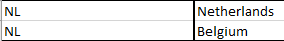

In [159]:
nc_nl[nc_nl['TDT_T_KEY_ORDER_DATE'] >= ' 2018-03-08']['SCM_OCI_LAND'].unique()

array(['BE', 'NL', 'LU'], dtype=object)

In [160]:
allowed_c = ['BE', 'NL']

In [161]:
dcr = nc_nl[(nc_nl['TDT_T_KEY_ORDER_DATE'] >= ' 2018-03-09') & (~nc_nl['SCM_OCI_LAND'].isin(allowed_c))]

In [162]:
len(dcr['SCM_N_ORDER_NR'].unique())

8

In [163]:
#No SP sold
(dcr['SCM_MASTER_AP_ID'] == 42225).sum()

0

In [164]:
#No SP discount applying neither
(dcr['SCM_MASTER_AP_ID'] == 42715).sum()

0

In [165]:
#Criteria
len(dcr[(dcr['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) & (~dcr['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded))]['SCM_N_ORDER_NR'].unique())

6

% Orders (looking at PG3 and PG4 set up) suitable for being offered SP but exclude due to DCR

In [166]:
float(len(dcr[(dcr['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) & 
              (~dcr['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded))]['SCM_N_ORDER_NR'].unique())) / \
                len(dcr['SCM_N_ORDER_NR'].unique()) * 100

75.0